In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kidney/kidney_disease.csv


In [37]:
import pandas as pd
import numpy as np

In [38]:
df_data=pd.read_csv('/kaggle/input/kidney/kidney_disease.csv')

In [39]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [40]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [41]:
df_data.shape

(400, 26)

In [42]:
df_data.drop('id',axis=1,inplace=True)

In [43]:
df_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [44]:
df_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [45]:
df_data.columns=['age','blood_pressure','specific_gravity','abumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps'
                ,'bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_celled_volume','white_blood_cel_count',
                'red_blood_cell_count','hypertension','diabates_mellitus','coronary_artery_disease','apetite','peda_edoma','anomia','class']

In [46]:
df_data.head()

,age,blood_pressure,specific_gravity,abumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_celled_volume,white_blood_cel_count,red_blood_cell_count,hypertension,diabates_mellitus,coronary_artery_disease,apetite,peda_edoma,anomia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [47]:
text_columns=['packed_celled_volume','white_blood_cel_count','red_blood_cell_count']
for i in text_columns:
    print(f'{i}:{df_data[i].dtype}')

packed_celled_volume:object
white_blood_cel_count:object
red_blood_cell_count:object


In [48]:
def convert_text_to_numeric(df_data,column):
    df_data[column]=pd.to_numeric(df_data[column],errors='coerce')
for column in text_columns:
    convert_text_to_numeric(df_data,column)
    print(f'{column}:{df_data[column].dtype}')
    

packed_celled_volume:float64
white_blood_cel_count:float64
red_blood_cell_count:float64


In [49]:
missing=df_data.isnull().sum()
missing[missing>0].sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cel_count      106
potassium                   88
sodium                      87
packed_celled_volume        71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
abumin                      46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabates_mellitus            2
coronary_artery_disease      2
apetite                      1
peda_edoma                   1
anomia                       1
dtype: int64

In [50]:
def mean_value_imputation(df_data,column):
    mean_value=df_data[column].mean()
    df_data.fillna({column: mean_value}, inplace=True)

def mode_value_imputation(df_data,column):
    mode=df_data[column].mode()[0]
    df_data[column]=df_data[column].fillna(mode)

In [51]:
df_data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'abumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_celled_volume',
       'white_blood_cel_count', 'red_blood_cell_count', 'hypertension',
       'diabates_mellitus', 'coronary_artery_disease', 'apetite', 'peda_edoma',
       'anomia', 'class'],
      dtype='object')

In [52]:
num_cols=[col for col in df_data.columns if df_data[col].dtype!='object']
num_cols
for col_name in num_cols:
    mean_value_imputation(df_data,col_name)

In [53]:
cat_cols=[col for col in df_data.columns if df_data[col].dtype =='object']
for col_name in cat_cols:
    mode_value_imputation(df_data,col_name)

In [54]:
pd.set_option('display.max_columns', None)
df_data.head()

,age,blood_pressure,specific_gravity,abumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_celled_volume,white_blood_cel_count,red_blood_cell_count,hypertension,diabates_mellitus,coronary_artery_disease,apetite,peda_edoma,anomia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [55]:
print(f"diabates_mellitus: {df_data['diabates_mellitus'].unique()}")
print(f"coronary_artery_disease: {df_data['coronary_artery_disease'].unique()}")
print(f"class: {df_data['class'].unique()}")


diabates_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease: ['no' 'yes' '\tno']
class: ['ckd' 'ckd\t' 'notckd']


In [56]:
df_data['diabates_mellitus']=df_data['diabates_mellitus'].replace(to_replace={" yes":"yes","\tno":"no","\tyes":"yes"})
df_data['coronary_artery_disease']=df_data['coronary_artery_disease'].replace(to_replace='\tno',value='no')
df_data['class']=df_data['class'].replace(to_replace={'ckd\t':'ckd','notckd':'not ckd'})

In [57]:
print(f"diabates_mellitus: {df_data['diabates_mellitus'].unique()}")
print(f"coronary_artery_disease: {df_data['coronary_artery_disease'].unique()}")
print(f"class: {df_data['class'].unique()}")


diabates_mellitus: ['yes' 'no']
coronary_artery_disease: ['no' 'yes']
class: ['ckd' 'not ckd']


In [58]:
df_data['hypertension'].unique()

array(['yes', 'no'], dtype=object)

In [59]:
df_data['class']=df_data['class'].map(lambda x:1 if x=='ckd' else 0)
df_data['red_blood_cells']=df_data['red_blood_cells'].map(lambda x:1 if x=='normal' else 0)
df_data['pus_cell']=df_data['pus_cell'].map(lambda x:1 if x=='normal' else 0)
df_data['pus_cell_clumps']=df_data['pus_cell_clumps'].map(lambda x:1 if x=='present' else 0)
df_data['bacteria']=df_data['bacteria'].map(lambda x:1 if x=='present' else 0)
df_data['hypertension']=df_data['hypertension'].map(lambda x:1 if x=='yes' else 0)
df_data['diabates_mellitus']=df_data['diabates_mellitus'].map(lambda x:1 if x=='yes' else 0)
df_data['coronary_artery_disease']=df_data['coronary_artery_disease'].map(lambda x:1 if x=='yes' else 0)
df_data['apetite']=df_data['apetite'].map(lambda x:1 if x=='good' else 0)
df_data['peda_edoma']=df_data['peda_edoma'].map(lambda x:1 if x=='yes' else 0)
df_data['anomia']=df_data['anomia'].map(lambda x:1 if x=='yes' else 0)




In [60]:
df_data

,age,blood_pressure,specific_gravity,abumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_celled_volume,white_blood_cel_count,red_blood_cell_count,hypertension,diabates_mellitus,coronary_artery_disease,apetite,peda_edoma,anomia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0,0,0,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,0,0,0,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0,0,0,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,0,0,0,1,0,0,0


In [61]:
df_data['hypertension'].unique()

array([1, 0])

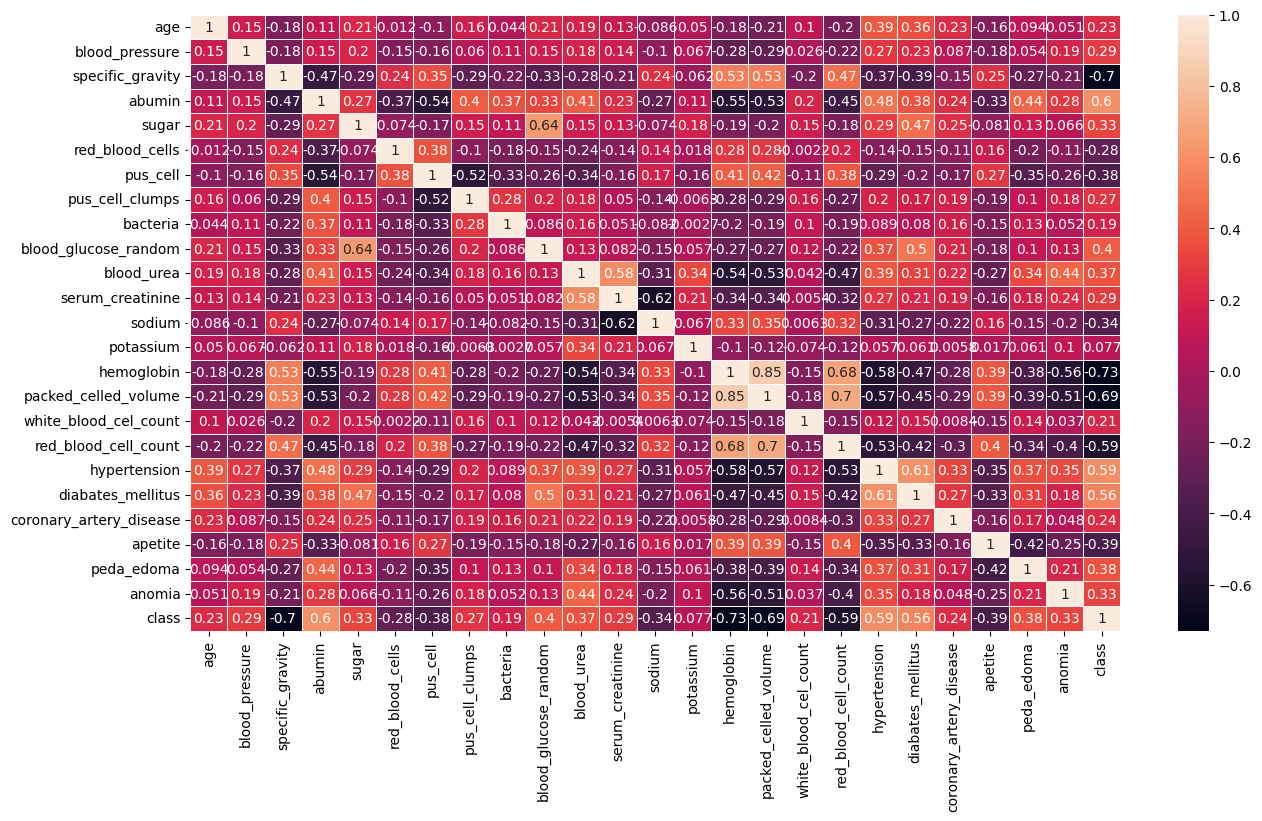

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df_data.corr(),annot=True,linewidths=0.5)
plt.show()

In [63]:
target_corr=df_data.corr()['class'].abs().sort_values(ascending=False)[1:]
target_corr

hemoglobin                 0.729628
specific_gravity           0.698957
packed_celled_volume       0.690060
abumin                     0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabates_mellitus          0.559060
blood_glucose_random       0.401374
apetite                    0.393341
pus_cell                   0.375154
peda_edoma                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anomia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cel_count      0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [64]:
df_data['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

In [65]:
x=df_data.drop("class",axis=1)
y=df_data["class"]
x

,age,blood_pressure,specific_gravity,abumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_celled_volume,white_blood_cel_count,red_blood_cell_count,hypertension,diabates_mellitus,coronary_artery_disease,apetite,peda_edoma,anomia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,1,0,1,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,1,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,0,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0,0,0,1,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,0,0,0,1,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0,0,0,1,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,0,0,0,1,0,0


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_test.head()

,age,blood_pressure,specific_gravity,abumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_celled_volume,white_blood_cel_count,red_blood_cell_count,hypertension,diabates_mellitus,coronary_artery_disease,apetite,peda_edoma,anomia
237,80.0,70.000000,1.015,2.0,2.0,1,1,0,0,141.000000,53.000000,2.200000,137.528754,4.627244,12.7,40.000000,9600.000000,4.707435,1,1,0,0,1,0
75,5.0,76.469072,1.015,1.0,0.0,1,1,0,0,148.036517,16.000000,0.700000,138.000000,3.200000,8.1,38.884498,8406.122449,4.707435,0,0,0,1,0,1
276,20.0,60.000000,1.025,0.0,0.0,1,1,0,0,148.036517,57.425722,3.072454,137.000000,4.700000,14.0,41.000000,4500.000000,5.500000,0,0,0,1,0,0
265,50.0,80.000000,1.020,0.0,0.0,1,1,0,0,97.000000,40.000000,0.600000,150.000000,4.500000,14.2,48.000000,10500.000000,5.000000,0,0,0,1,0,0
395,55.0,80.000000,1.020,0.0,0.0,1,1,0,0,140.000000,49.000000,0.500000,150.000000,4.900000,15.7,47.000000,6700.000000,4.900000,0,0,0,1,0,0


In [67]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()

In [68]:
dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
y_predicted=dct.predict(x_test)
y_predicted

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [70]:
np.array(y_test.head(50))

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0])

In [71]:
pd.set_option('display.max_columns', None)
df_data.head()

,age,blood_pressure,specific_gravity,abumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_celled_volume,white_blood_cel_count,red_blood_cell_count,hypertension,diabates_mellitus,coronary_artery_disease,apetite,peda_edoma,anomia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [72]:
my_pred=[[50,70.0,1.090,3.0,4.0,1,0,1,1,148.000000,98.0,2.4,138.727244,12.4,45.0,7500.0,5.200000,1,0,1,1,0,0,1]]

In [73]:
new_pred=dct.predict(my_pred)
new_pred

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [74]:
y_pred_test=dct.predict(x_test)
y_pred_test

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [76]:
models=[]
models.append(('Naive Bayes',GaussianNB()))
models.append(('Knn',KNeighborsClassifier(n_neighbors=8)))
models.append(("RandomForestClassifier",RandomForestClassifier()))
models.append(("DecisionTreeClassifier",DecisionTreeClassifier()))
models.append(('SVM',SVC(kernel='linear')))


In [77]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [78]:
for name,model in models:
    print(name,model)
    print()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print("accuracy:",accuracy_score(y_test,y_pred))
    print('\n')
    print('precision:',precision_score(y_test,y_pred))
    print('\n')
    print("recall:",recall_score(y_test,y_pred))
    print('\n')
    print('f1_score:',f1_score(y_test,y_pred))
    print('\n')

Naive Bayes GaussianNB()

[[35  0]
 [ 3 62]]


accuracy: 0.97


precision: 1.0


recall: 0.9538461538461539


f1_score: 0.9763779527559054


Knn KNeighborsClassifier(n_neighbors=8)

[[31  4]
 [35 30]]


accuracy: 0.61


precision: 0.8823529411764706


recall: 0.46153846153846156


f1_score: 0.606060606060606


RandomForestClassifier RandomForestClassifier()

[[34  1]
 [ 0 65]]


accuracy: 0.99


precision: 0.9848484848484849


recall: 1.0


f1_score: 0.9923664122137404


DecisionTreeClassifier DecisionTreeClassifier()

[[33  2]
 [ 2 63]]


accuracy: 0.96


precision: 0.9692307692307692


recall: 0.9692307692307692


f1_score: 0.9692307692307692


SVM SVC(kernel='linear')

[[32  3]
 [ 4 61]]


accuracy: 0.93


precision: 0.953125


recall: 0.9384615384615385


f1_score: 0.9457364341085271


